In [1]:
import os
#used to connect notebook to the drive(could be local or cloud)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
os.chdir(r"C:\Users\Karan\OneDrive\Desktop\New folder (2)\ML")

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe(percentiles=[0.01,.025,0.05,.95,.975,.98,.99,.995]).T

,count,mean,std,min,1%,2.5%,5%,50%,95%,97.5%,98%,99%,99.5%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.000000,0.00000,3.0000,10.00000,12.00000,12.00000,13.00000,13.16500,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,71.175000,79.00000,117.0000,181.00000,189.00000,192.32000,196.00000,197.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.000000,38.70000,72.0000,90.00000,96.00000,99.32000,106.00000,110.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.000000,0.00000,23.0000,44.00000,47.00000,48.00000,51.33000,54.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.000000,0.00000,30.5000,293.00000,400.25000,470.94000,519.90000,582.46500,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.517500,21.80000,32.0000,44.39500,46.46500,47.52600,50.75900,53.49700,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.123525,0.14035,0.3725,1.13285,1.31345,1.39066,1.69833,1.93326,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.000000,21.00000,29.0000,58.00000,63.00000,64.66000,67.00000,69.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,0.00000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [7]:
df2=df.copy()

In [8]:
# Dropping rows where BP,ST,In & BMI all are missing (Only 7 rows affected) <0.1%
7/768

0.009114583333333334

In [9]:
dfn=df2.drop(df2[(df2['BloodPressure']==0)&(df2['SkinThickness']==0)&(df2['Insulin']==0)&(df2['BMI']==0)].index)

In [10]:
dfn.shape

(761, 9)

##### BMI

In [11]:
# Replacing missing BloodPressures with mean of BloodPressures (as mean and median are close)

In [12]:
bpm=dfn[dfn['BloodPressure']!=0].BloodPressure.sum()/len(dfn[dfn['BloodPressure']!=0])
bpm

72.40518417462484

In [13]:
dfn[dfn['BloodPressure']!=0].BloodPressure.median()

72.0

In [14]:
dfn['BloodPressure']=np.where(dfn['BloodPressure']==0,bpm,dfn['BloodPressure'])

##### Pregnancies

In [15]:
# Capping Pregnancy to 10 months

In [16]:
dfn['Pregnancies']=np.where(dfn['Pregnancies']>10,10,dfn['Pregnancies'])

In [17]:
dfn['Pregnancies'].value_counts()

1     135
0     110
2     101
3      74
4      68
5      57
10     57
6      49
7      44
8      38
9      28
Name: Pregnancies, dtype: int64

##### SkinThickness

In [18]:
# capping the skinthickness to 63  & replacing missing values with the mean/median(skewness only because of 0)

In [19]:
dfn['SkinThickness']=np.where(dfn['SkinThickness']>63,63,dfn['SkinThickness'])

In [20]:
skt=dfn[dfn['SkinThickness']!=0].SkinThickness.sum()/len(dfn[dfn['SkinThickness']!=0])
skt 

29.086876155268023

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

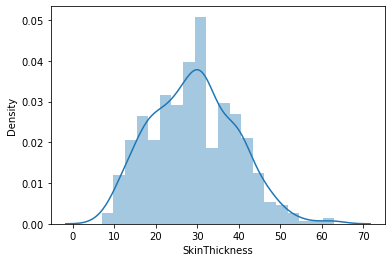

In [21]:
sns.distplot(dfn[dfn['SkinThickness']!=0].SkinThickness,bins=20)

In [22]:
dfn[dfn['SkinThickness']!=0].SkinThickness.median()

29.0

In [23]:
dfn['SkinThickness']=np.where(dfn['SkinThickness']==0,skt,dfn['SkinThickness'])

##### Glucose

In [24]:
dfn['Glucose']=np.where(dfn['Glucose']==0,dfn['Glucose'].median(),dfn['Glucose'])

In [25]:
dfn['Glucose'].value_counts()

99.0     17
100.0    17
117.0    16
125.0    14
129.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 135, dtype: int64

##### BMI

In [26]:
bm=dfn['BMI'].median()
bm

32.2

In [27]:
dfn['BMI']=np.where(dfn['BMI']==0,bm,dfn['BMI'])

##### DiabetesPedigreeFunction

In [28]:
# Capping to 1

In [29]:
dfn['DiabetesPedigreeFunction']=np.where(dfn['DiabetesPedigreeFunction']>1,1,dfn['DiabetesPedigreeFunction'])

In [30]:
dfn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.086876,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,1.000,33,1


#### Insulin

In [ ]:
dfn['Insulin']=np.where(dfn['Insulin']==0,dfn['Insulin'].median(),dfn['Insulin'])

In [227]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
#     x=x.clip(lower=x.quantile(0.01))   #remove if lower outliers needed 
    return x

In [ ]:
outlier_capping(dfn['Insulin'])

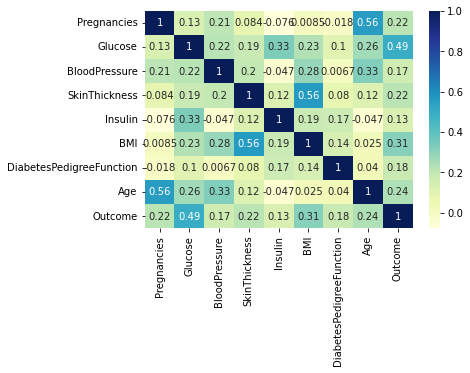

In [31]:
sns.heatmap(dfn.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [32]:
abc=dfn.corr()
abc[(abc > 0.4) & (abc < 1.0)].stack()[0:3]

Pregnancies    Age        0.558036
Glucose        Outcome    0.491450
SkinThickness  BMI        0.558960
dtype: float64

In [33]:
# Data is cleaned. Now,
# converting into categories

In [72]:
x=dfn.drop(columns=['Outcome'])
y=dfn['Outcome']

In [73]:
# Checking VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Var']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by=['VIF'],ascending=False)

NameError: name 'x' is not defined

#### Age categorize

In [34]:
#Age 21-31 :0 
# Age 31-41 :2
# Age 41-51 :3
# Age 51-61 :4
# Age 61>  :5

In [35]:
dfn['Age']=np.where(dfn['Age']<=31,0,dfn['Age'])
dfn['Age']=np.where((dfn['Age']>31)&(dfn['Age']<=41),1,dfn['Age'])
dfn['Age']=np.where((dfn['Age']>41)&(dfn['Age']<=51),2,dfn['Age'])
dfn['Age']=np.where((dfn['Age']>51)&(dfn['Age']<=61),3,dfn['Age'])
dfn['Age']=np.where(dfn['Age']>61,4,dfn['Age'])

<AxesSubplot:ylabel='Age'>

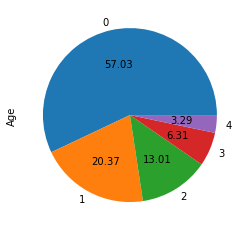

In [36]:
dfn["Age"].value_counts().plot(kind="pie", autopct="%.2f")

In [37]:
dt=pd.crosstab(dfn['Age'],dfn['Outcome'])
dt

Outcome,0,1
Age,,
0,332,102
1,79,76
2,43,56
3,21,27
4,19,6


<AxesSubplot:xlabel='Age', ylabel='count'>

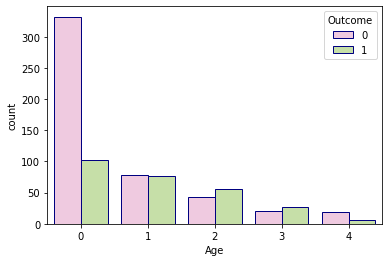

In [38]:
sns.countplot(dfn['Age'], hue=dfn['Outcome'],palette="PiYG", linewidth=1.0, edgecolor="navy")

#### Pregnancy categorize

In [39]:
# Dividing Pregnancy into trimesters
# 0
# 1-3 :1
# 4-6 :2
# 6-9 :3
# 10 :4

In [40]:
dfn['Pregnancies']=np.where(dfn['Pregnancies'].isin([1,2,3]),1,dfn['Pregnancies'])

In [41]:
dfn['Pregnancies']=np.where(dfn['Pregnancies'].isin([4,5,6]),2,dfn['Pregnancies'])

In [42]:
dfn['Pregnancies']=np.where(dfn['Pregnancies'].isin([7,8,9]),3,dfn['Pregnancies'])

In [43]:
dfn['Pregnancies']=np.where(dfn['Pregnancies']==10,4,dfn['Pregnancies'])

<AxesSubplot:ylabel='Pregnancies'>

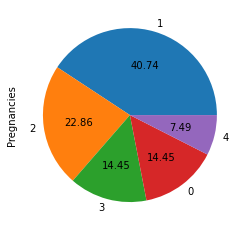

In [44]:
dfn["Pregnancies"].value_counts().plot(kind="pie", autopct="%.2f")

#### BMI categorize

In [45]:
# Converting BMI into Categories
# <18.5 (Under weight)    0
# 18.5-24.9 (Healthy)     1
# 25-29.9 (overweight)    2
# >30  (Obese)            3

In [46]:
 dfn['BMI']=np.where(dfn['BMI']<=18.5,0,dfn['BMI'])

In [47]:
dfn['BMI']=np.where((dfn['BMI']>18.5)&(dfn['BMI']<24.9),1,dfn['BMI'])

In [48]:
dfn['BMI']=np.where((dfn['BMI']>=24.9)&(dfn['BMI']<=29.9),2,dfn['BMI'])

In [49]:
 dfn['BMI']=np.where(dfn['BMI']>=30,3,dfn['BMI'])

<AxesSubplot:ylabel='BMI'>

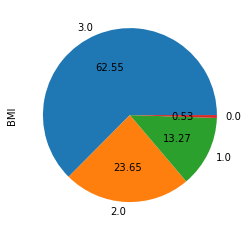

In [50]:
dfn['BMI'].value_counts().plot(kind='pie',autopct='%.2f')

#### BloodPressure categorize

In [51]:
# systolic vs diastolic pressure: Looks like we have diastolic pressure given

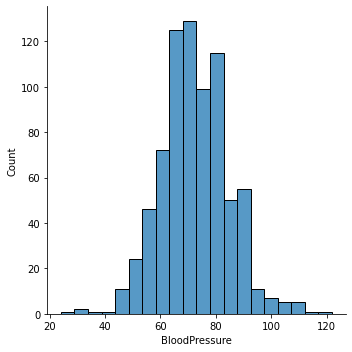

In [52]:
sns.displot(dfn['BloodPressure'],bins=20)

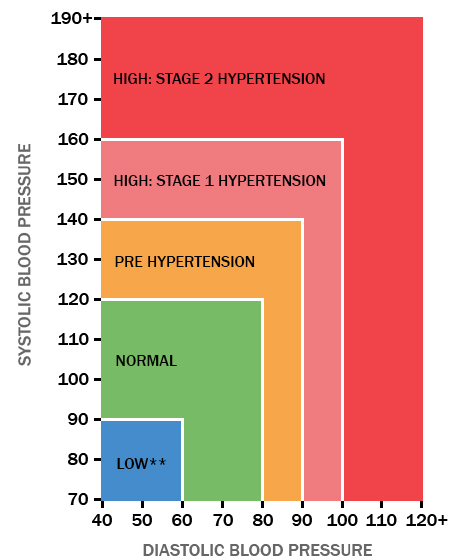

In [53]:
from PIL import Image
img = Image.open("bp-range-chart.jpg")
img

In [54]:
# Categorizing Diastolic BP
# 0-60    : 0
# 60-80   : 1
# 80-100  : 2
# 100>    : 3

In [55]:
 dfn['BloodPressure']=np.where(dfn['BloodPressure']<=60,0,dfn['BloodPressure'])

In [56]:
dfn['BloodPressure']=np.where((dfn['BloodPressure']>60)&(dfn['BloodPressure']<=80),1,dfn['BloodPressure'])

In [57]:
dfn['BloodPressure']=np.where((dfn['BloodPressure']>80)&(dfn['BloodPressure']<=100),2,dfn['BloodPressure'])

In [58]:
dfn['BloodPressure']=np.where(dfn['BloodPressure']>100,3,dfn['BloodPressure'])

<AxesSubplot:ylabel='BloodPressure'>

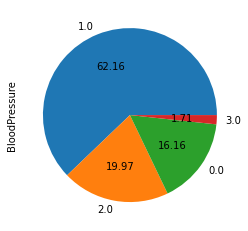

In [59]:
dfn['BloodPressure'].value_counts().plot(kind='pie',autopct='%.2f')

In [63]:
dfn['GLC_log']=np.log1p(dfn['Glucose'])

#### SkinThickness Categorize

In [ ]:
# <15 :0
# 15-30 :1
# 30-45 :2
# 45> :3

In [65]:
 dfn['SkinThickness']=np.where(dfn['SkinThickness']<=15,0,dfn['SkinThickness'])

In [66]:
dfn['SkinThickness']=np.where((dfn['SkinThickness']>15)&(dfn['SkinThickness']<=30),1,dfn['SkinThickness'])

In [67]:
dfn['SkinThickness']=np.where((dfn['SkinThickness']>30)&(dfn['SkinThickness']<=45),2,dfn['SkinThickness'])

In [69]:
dfn['SkinThickness']=np.where(dfn['SkinThickness']>45,3,dfn['SkinThickness'])

In [136]:
dfn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLC_log,Insulin_log
0,2,148.0,1.0,2.0,36.0,3.0,0.627,2,1,5.003946,3.610918
1,1,85.0,1.0,1.0,36.0,2.0,0.351,0,0,4.454347,3.610918
2,3,183.0,1.0,1.0,36.0,1.0,0.672,1,1,5.214936,3.610918
3,1,89.0,1.0,1.0,94.0,2.0,0.167,0,0,4.499810,4.553877
4,0,137.0,0.0,2.0,168.0,3.0,1.000,1,1,4.927254,5.129899


In [72]:
x=dfn.drop(columns=['Outcome','Glucose'])#,'SkinThickness'])
y=dfn['Outcome']

In [73]:
x.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GLC_log
0,2,1.0,2.0,0,3.0,0.627,2,5.003946
1,1,1.0,1.0,0,2.0,0.351,0,4.454347
2,3,1.0,1.0,0,1.0,0.672,1,5.214936
3,1,1.0,1.0,94,2.0,0.167,0,4.499810
4,0,0.0,2.0,168,3.0,1.000,1,4.927254


#### Modeling 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=88)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [77]:
import time
t1 = time.time()

parameters = {  
    'n_estimators': [22,24,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (4,6,8),     
    'criterion'   : ['gini', 'entropy'],
}
model = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = model,     
                          param_grid = parameters, 
                          cv = 2,
                          n_jobs = -1,
                          return_train_score = False,
                          scoring = "accuracy"      
                         )
gridsearch.fit(X_train, y_train)

t2 = time.time()

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))
print((t2-t1)/60)

Best params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 32}
Best Score: 0.756578947368421
0.08270994027455648


In [102]:
forest = RandomForestClassifier(n_estimators=32, max_depth=6, max_features='auto',criterion='gini',random_state=9)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=32, random_state=9)

In [103]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.8470394736842105
0.7450980392156863


In [104]:
# Test

In [220]:
outlier_capping(dfn['Insulin'])

0       36.0
1       36.0
2       36.0
3       94.0
4      168.0
       ...  
763    180.0
764     36.0
765    112.0
766     36.0
767     36.0
Name: Insulin, Length: 761, dtype: float64

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Var']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by=['VIF'],ascending=False)

,Var,VIF
4,GLC_log,44.950011
5,Insulin_log,36.081045
1,BMI,13.267443
2,DiabetesPedigreeFunction,4.185774
0,Pregnancies,3.945663
3,Age,2.001869


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLC_log,Insulin_log
Pregnancies,1.000000,0.113046,0.168574,0.048124,-0.046150,0.071926,-0.016605,0.482245,0.194057,0.109729,-0.074397
Glucose,0.113046,1.000000,0.216808,0.145868,0.359774,0.221734,0.104187,0.227448,0.491450,0.987764,0.302467
BloodPressure,0.168574,0.216808,1.000000,0.128196,-0.000411,0.203163,0.007148,0.257291,0.180474,0.217978,-0.028021
SkinThickness,0.048124,0.145868,0.128196,1.000000,0.217901,0.419856,0.102689,0.023099,0.178506,0.144786,0.242280
Insulin,-0.046150,0.359774,-0.000411,0.217901,1.000000,0.187303,0.160049,-0.019918,0.150226,0.351171,0.907495
BMI,0.071926,0.221734,0.203163,0.419856,0.187303,1.000000,0.114712,0.047160,0.313705,0.218082,0.200190
DiabetesPedigreeFunction,-0.016605,0.104187,0.007148,0.102689,0.160049,0.114712,1.000000,0.042552,0.180128,0.097547,0.193557
Age,0.482245,0.227448,0.257291,0.023099,-0.019918,0.047160,0.042552,1.000000,0.209816,0.217762,-0.076107
Outcome,0.194057,0.491450,0.180474,0.178506,0.150226,0.313705,0.180128,0.209816,1.000000,0.480512,0.123118
GLC_log,0.109729,0.987764,0.217978,0.144786,0.351171,0.218082,0.097547,0.217762,0.480512,1.000000,0.306190


In [127]:
dfn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLC_log,Insulin_log
0,2,148.0,1.0,2.0,36.0,3.0,0.627,2,1,5.003946,3.610918
1,1,85.0,1.0,1.0,36.0,2.0,0.351,0,0,4.454347,3.610918
2,3,183.0,1.0,1.0,36.0,1.0,0.672,1,1,5.214936,3.610918
3,1,89.0,1.0,1.0,94.0,2.0,0.167,0,0,4.499810,4.553877
4,0,137.0,0.0,2.0,168.0,3.0,1.000,1,1,4.927254,5.129899


In [221]:
dfn['Insulin_log']=np.log1p(dfn['Insulin'])

In [222]:
x=dfn.drop(columns=['Outcome','Glucose','Insulin','BloodPressure','SkinThickness']) #Skinthickness and BloodPressure removed
y=dfn['Outcome']

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=9)

In [224]:
import time
t1 = time.time()

parameters = {  
    'n_estimators': [20,22,24],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (3,4,6),     
    'criterion'   : ['gini', 'entropy'],
}
model = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = model,     
                          param_grid = parameters, 
                          cv = 2,
                          n_jobs = -1,
                          return_train_score = False,
                          scoring = "accuracy"      
                         )
gridsearch.fit(X_train, y_train)

t2 = time.time()

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))
print((t2-t1)/60)

Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 20}
Best Score: 0.7828947368421053
0.08392897049585978


In [225]:
forest = RandomForestClassifier(n_estimators=20, max_depth=3, max_features='log2',criterion='gini',random_state=9)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=20,
                       random_state=9)

In [226]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.8042763157894737
0.7254901960784313


#### Logistics

In [137]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [138]:
log=LogisticRegression(max_iter=1000)

In [139]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [140]:
log.score(X_train,y_train) #gives accuracy for the test data

0.7763157894736842

In [141]:
log.score(X_test,y_test) # gives accuracy for test data

0.738562091503268

#### Confusion matrix

In [142]:
pred_train=log.predict(X_train)
Pred_test=log.predict(X_test)

In [143]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_train,pred_train),columns=['Pred_0','Pred_1'],index=['act_0','act_1'])
cnf

,Pred_0,Pred_1
act_0,353,45
act_1,91,119


In [144]:
print(metrics.classification_report(y_train,pred_train))  

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       398
           1       0.73      0.57      0.64       210

    accuracy                           0.78       608
   macro avg       0.76      0.73      0.74       608
weighted avg       0.77      0.78      0.77       608



In [145]:
print(metrics.classification_report(y_test,Pred_test)) 

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        96
           1       0.72      0.49      0.58        57

    accuracy                           0.74       153
   macro avg       0.73      0.69      0.70       153
weighted avg       0.74      0.74      0.73       153

